# Phase 2 Milestone 1
### Anggito Krisnandhana Zainul
### Dataset
**This dataset contains customer data of Telco with attributes such as: demographic, account information, services that the customers signed up for, and whether the customer leaves within one month(Churn).**

**Link: https://www.kaggle.com/blastchar/telco-customer-churn**

### Objective
**Develop an Artifical Neural Network (ANN) model to predict customer churn.**

# A. Library Import

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import BatchNormalization

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline

import joblib

from keras.models import Sequential
from keras import layers
from keras.layers.core import Dropout

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# B. Data Loading

In [2]:
data = pd.read_csv(r"C:\Users\akaza\OneDrive\Documents\Hacktiv8\P2\Milestone 1\Telco-Customer-Churn.csv")

df = data.copy()

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# C. Data Cleaning

## Data Types

In [3]:
data.select_dtypes("object").describe().T

,count,unique,top,freq
customerID,7043,7043,5376-DEQCP,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**The "TotalCharges" column is inaccurately labeled as an object datatype, it should be a numeric one.**

In [4]:
df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

## Missing Values

In [5]:
print("Missing Values in Dataset")

df.isna().sum()

Missing Values in Dataset


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**There appears to be 11 missing values under the TotalCharges column. Considering the amount of missing values is small compared to the total rows, the rows with the missing values are going to be deleted.**

In [6]:
df = df.dropna()

**There appears to be no missing values in the dataset.**

# D. Exploratory Data Analysis

## Customer Gender Distribution

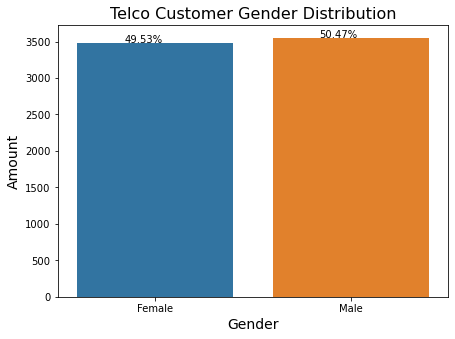

In [7]:
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.countplot(x="gender", data=df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(df)), (p.get_x() + 0.24, p.get_height() + 2))

plt.title('Telco Customer Gender Distribution', fontsize= 16)
plt.xlabel('Gender', fontsize= 14)
plt.ylabel('Amount', fontsize= 14)

plt.show()

**The percentage of male customers are slightly more than the female counterparts but overall, Telco have more or less equal number of Male and Female customers.**

## Customer Tenure Distribution

Text(0.5, 1.0, 'Telco Customer Tenure Distribution')

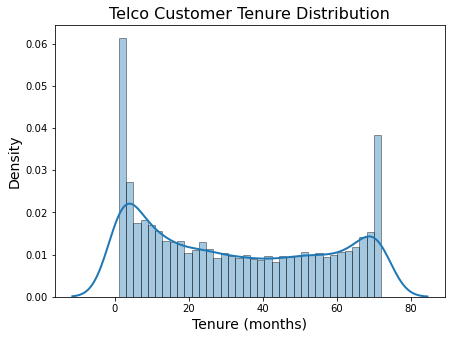

In [8]:
fig, ax = plt.subplots(figsize=(7,5))

ax = sns.distplot(df['tenure'], hist=True, kde=True, bins=int(180/5), 
                  hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 2})

ax.set_xlabel('Tenure (months)', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

ax.set_title('Telco Customer Tenure Distribution', size=16)

**The graph above illustrates the distribution of tenure is converged at the head and tail of the data. This indicates that there are a lot of people who try Telco services for 1-2 months before leaving. At the same time, Telco cultivated significant amount of loyal customers that have been with Telco for 71-72 months.**

## Customer Churn Rate

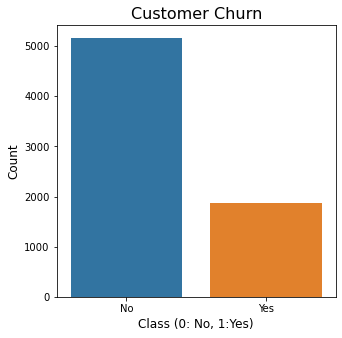

There are 5163 (73.422%) customers who did not leave Telco within one month and 1869 (26.578%) who did in the dataset.


In [9]:
counts = df.Churn.value_counts()
no = counts[0]
yes = counts[1]

# Plot
plt.figure(figsize=(5,5))
sns.barplot(x=counts.index, y=counts)
plt.title('Customer Churn', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class (0: No, 1:Yes)', fontsize=12)
plt.show()

# Percentage
perc_normal = (no/(no+yes))*100
perc_fraudulent = (yes/(no+yes))*100
print('There are {} ({:.3f}%) customers who did not leave Telco within one month and {} ({:.3f}%) who did in the dataset.'.format(no, perc_normal, yes, perc_fraudulent))

**A study conducted by profitwell.com found that 10+ year old companies have an average 2-4% churn rate, while younger companies churn rate ranges from 4%-24%.**

**Although Telco is largely succesful in keeping their customers happy, their performance is under the industry standards, and thus needs to improve their customer retention strategies.**

## Churn Rate by Contract Type

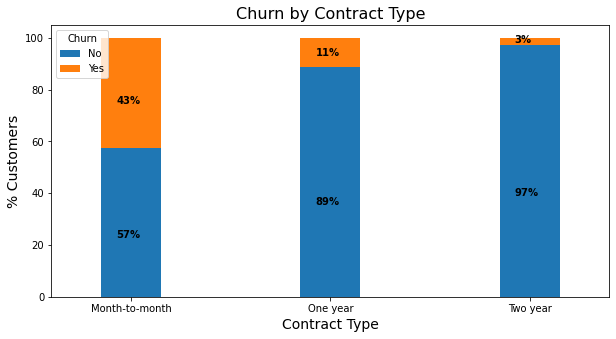

In [10]:
contract_churn = df.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True,
                                                              rot = 0, figsize = (10,5))

ax.legend(loc='best',prop={'size':10},title = 'Churn')
ax.set_xlabel('Contract Type', size = 14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 16)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'black',
                weight = 'bold', size = 10)

**Unsurpringly, the less binding the cotract type is, the higher the churn rate is.**

**Customers with a month-to-month contract has the highest churn rate of 43%. This aligns with the finding from the Tenure Distribution graph, which is that there are a lot of people who would try Telco services for a couple of months before stopping.**

**This finding also suggest that Telco needs a strategy to convert customers with a month-to-month contract to atleast sign a One year contract in order to reduce the overall Churn rate.**

## Correlation between Features

In [11]:
# Manually Encode Feature Values with Numerical Label

df.gender.replace(("Female", "Male"), (0, 1), inplace = True)

df.Partner.replace(("No", "Yes"), (0, 1), inplace = True)

df.Dependents.replace(("No", "Yes"), (0, 1), inplace = True)

df.PhoneService.replace(("No", "Yes"), (0, 1), inplace = True)

# 'No phone service' and 'No' are practically the same.
df.MultipleLines.replace(("No phone service", "No", "Yes"), (0, 0, 1), inplace = True) 

df.InternetService.replace(("No", "DSL", "Fiber optic"), (0, 1, 2), inplace = True)

# 'No internet service' and 'No' are practically the same.
df.OnlineSecurity.replace(("No internet service", "No", "Yes"), (0, 0, 2), inplace = True)

df.OnlineBackup.replace(("No internet service", "No", "Yes"), (0, 0, 2), inplace = True)

df.DeviceProtection.replace(("No internet service", "No", "Yes"), (0, 0, 2), inplace = True)

df.TechSupport.replace(("No internet service", "No", "Yes"), (0, 0, 2), inplace = True)

df.StreamingTV.replace(("No internet service", "No", "Yes"), (0, 0, 2), inplace = True)

df.StreamingMovies.replace(("No internet service", "No", "Yes"), (0, 0, 2), inplace = True)

df.Contract.replace(('Month-to-month', 'One year', 'Two year'), (0, 1, 2), inplace = True)

df.PaperlessBilling.replace(("No", "Yes"), (0, 1), inplace = True)

df.PaymentMethod.replace(('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'),
                         (1, 2, 3, 4), inplace = True)

df.Churn.replace(("No", "Yes"), (0, 1), inplace = True)

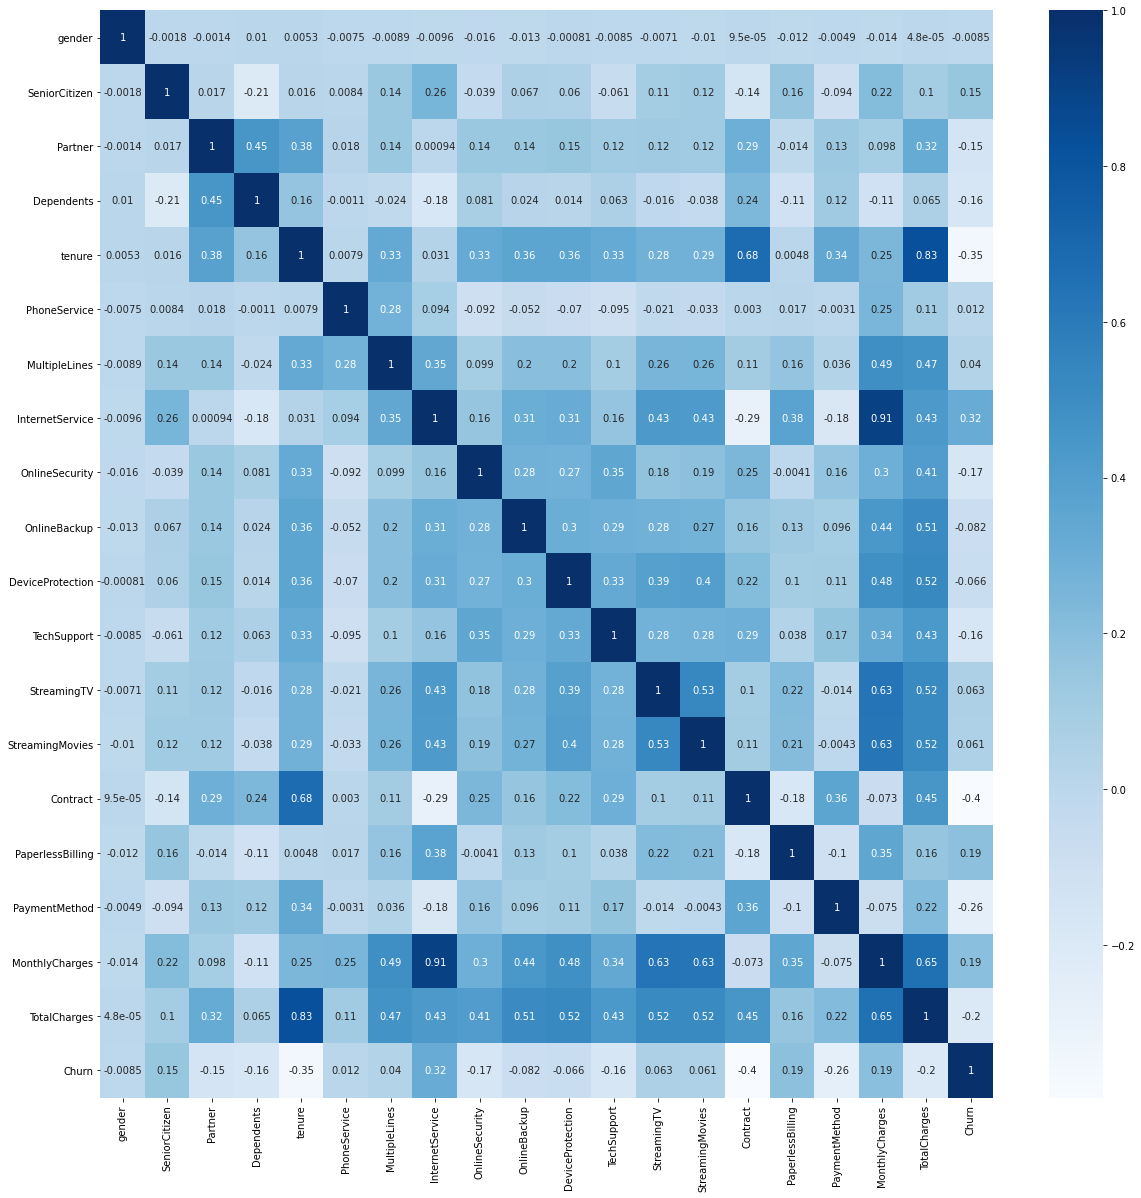

In [12]:
plt.figure(figsize = (20,20))

sns.heatmap(df.corr(), cmap = plt.cm.Blues, annot = True)

plt.show()

* **The most significantly correlated variable to Churning is found to be the contract type, specifically it negatively correlated with churning. In other words, customer with more long term contracts are least likely to leave Telco within one month. This is a logically sound finding and in line with the previous EDA finding.**
* **Tenure is also found to be significantly and negatively correlated to churn. This indicates that the customer's tendency to leave Telco reduces the longer they stay with Telco. This speaks volume to Telco's success in maintaining customer satisfaction.**
* **One interesting thing is that the InternetService feature column is found to be positively correlated to Churning with a significant rate. This means that customers who uses Telco for their InternetService are more likely to churn. An evaluation on the quality of internet service provided by customer needs to be done because this finding suggest that generally customer left Telco due to issues relating to Internet services.**

# E. Data Preprocessing

## Feature and Label Definition

In [13]:
# customerID is dropped as a feature because it is entirely irrelevant to Churning
# gender is dropped because there is no logical reason why it would affect Churning
# TotalCharges is dropped because I find it redundant to have both MonthlyCharges and TotalCharges
# MonthlyCharges is a more fair factor because customers with longer tenure will have higher TotalCharge.

X = df.drop(columns = ["customerID", "gender", "TotalCharges", "Churn"])

cols_to_scale = ['tenure', 'MonthlyCharges']
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

y = df["Churn"]

## Tensorflow Data Pipeline

In [14]:
dataset = tf.data.Dataset.from_tensor_slices((X, y))

## Data Splitting

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Scaling the data with continuous values
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

# F. Model Definition

## for the Tensor dataset

In [16]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [17]:
def get_basic_model():
  model = tf.keras.Sequential([
      normalizer,
      
      tf.keras.layers.Dense(12, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),

      tf.keras.layers.Dense(6, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),
      
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [18]:
model_tf = get_basic_model()

## for the Standard Data

In [19]:
model_krs = Sequential()

Input_Shape = X_train.shape[1]

model_krs.add(layers.Dense(12, input_shape=(Input_Shape,), activation='relu'))
model_krs.add(Dropout(0.2)) # Model Improvement
model_krs.add(BatchNormalization()) # Model Improvement

model_krs.add(layers.Dense(6, activation='relu'))
model_krs.add(Dropout(0.2)) # Model Improvement
model_krs.add(BatchNormalization()) # Model Improvement

model_krs.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model_krs.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model_krs.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                216       
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 batch_normalization_2 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dropout_3 (Dropout)         (None, 6)                 0         
                                                                 
 batch_normalization_3 (Batc  (None, 6)                24        
 hNormalization)                                      

# G. Model Fitting

## With the tensorflow pipeline data

In [22]:
len(list(dataset))

7032

In [23]:
batches = dataset.shuffle(4922).batch(30)
test_batch = dataset.shuffle(2110).batch(30)

tensor_model = model_tf.fit(batches, epochs=100, validation_data=test_batch)

Epoch 1/100
235/235 [==============================] - 2s 3ms/step - loss: 0.6682 - accuracy: 0.6297 - val_loss: 0.5363 - val_accuracy: 0.7541
Epoch 2/100
235/235 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.7506 - val_loss: 0.4652 - val_accuracy: 0.7804
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4804 - accuracy: 0.7619 - val_loss: 0.4430 - val_accuracy: 0.7821
Epoch 4/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7737 - val_loss: 0.4345 - val_accuracy: 0.7878
Epoch 5/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4624 - accuracy: 0.7752 - val_loss: 0.4299 - val_accuracy: 0.7877
Epoch 6/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4627 - accuracy: 0.7672 - val_loss: 0.4261 - val_accuracy: 0.7928
Epoch 7/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4552 - accuracy: 0.7742 - val_loss: 0.4250 - val_accuracy: 0.7931

## With the standard data

In [24]:
standard_model = model_krs.fit(X_train, y_train, epochs=100, verbose=True, validation_data=(X_test, y_test), batch_size=30)

Epoch 1/100
188/188 [==============================] - 1s 2ms/step - loss: 0.7060 - accuracy: 0.5979 - val_loss: 0.5624 - val_accuracy: 0.7697
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.7349 - val_loss: 0.4850 - val_accuracy: 0.7889
Epoch 3/100
188/188 [==============================] - ETA: 0s - loss: 0.5093 - accuracy: 0.75 - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7525 - val_loss: 0.4621 - val_accuracy: 0.7783
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4960 - accuracy: 0.7588 - val_loss: 0.4502 - val_accuracy: 0.7783
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7662 - val_loss: 0.4435 - val_accuracy: 0.7839
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7687 - val_loss: 0.4403 - val_accuracy: 0.7832
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7698

# H. Model Evaluation

## With the tensorflow pipeline data

### Loss and Accuracy Graph

In [25]:
def plot_history(a):
    acc = a.history['accuracy']
    val_acc = a.history['val_accuracy']
    loss = a.history['loss']
    val_loss = a.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Testing Accuracy')
    plt.title('Training and Testing Accuracy', fontsize=16)
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Testing Loss')
    plt.title('Training and Testing Loss', fontsize=16)
    plt.legend()

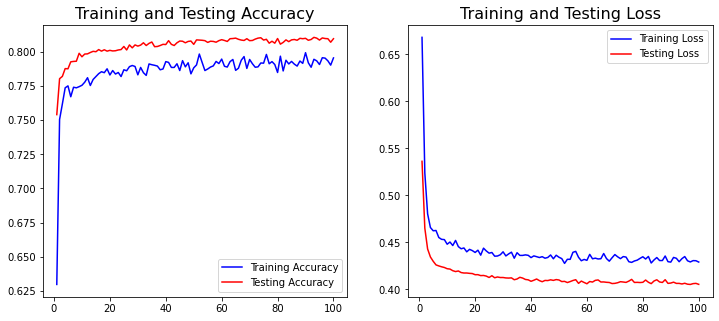

In [26]:
plot_history(tensor_model)

* **The Accuracy graph shows how the model's accuracy increased for each iterations. The model's accuracy using the testing dataset is consistently higher than when it uses the training dataset throughout the iterations.**
* **Simlarly, the Loss decreased for each model iterations. The model's loss using the testing dataset is also consistently lower than when it uses the training dataset throughout the iterations.**
* **The spiking throughout the accuracy and loss graph line for the training dataset is noticeably more sporadic compared to the line for the testing dataset.**

## With the Standard Data

### Accuracy and Loss

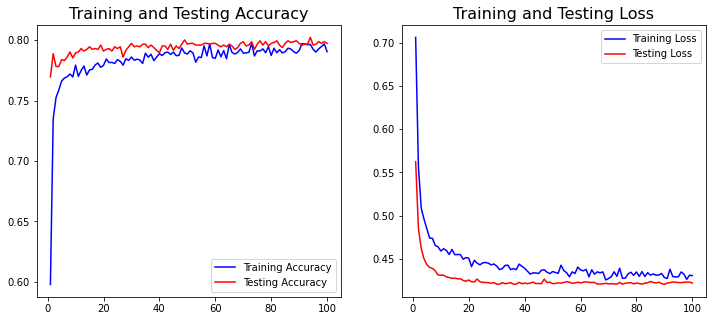

In [27]:
plot_history(standard_model)

### Confusion Matrix

Text(60.0, 0.5, 'Actual')

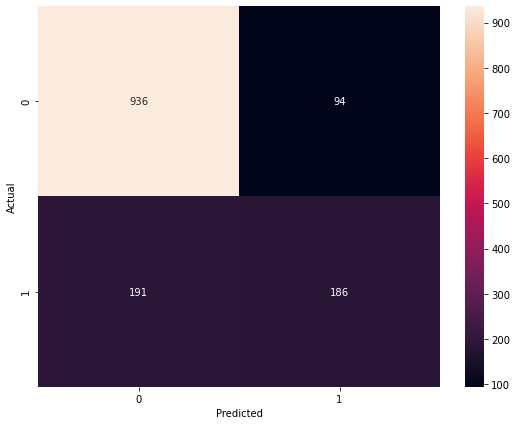

In [28]:
y_pred_tf = model_krs.predict(X_test)
    
y_pred_tf_actual = []

for i in y_pred_tf:
    if i > 0.5:
        y_pred_tf_actual.append(1)
    else:
        y_pred_tf_actual.append(0)
        
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_tf_actual)

plt.figure(figsize=(9,7))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

**The confusion matrix above visualizes that the model accurately classified 208 customers that left Telco within one month and 913 customers who did not leave.**

In [29]:
accuracy = metrics.accuracy_score(y_test, y_pred_tf_actual)
    
print ("Accuracy : %s" % "{0:.2%}".format(accuracy))

#Print Recall
recall = metrics.recall_score(y_test, y_pred_tf_actual)
    
print ("Recall : %s" % "{0:.2%}".format(recall))

Accuracy : 79.74%
Recall : 49.34%


**Overall, the model using the standard dataset have a 79.67% accuracy and 55.17% recall rate.**

# Model Improvement

**Trying different parameters, amount of perceptrons, and amount of hidden layers to try and improve the model's performance.**

In [30]:
model_krs2 = Sequential()

Input_Shape = X_train.shape[1]

model_krs2.add(layers.Dense(100, input_shape=(Input_Shape,), kernel_initializer=tf.keras.initializers.HeNormal(),
                           activation='relu'))
model_krs2.add(Dropout(0.2)) # Model Improvement
model_krs2.add(BatchNormalization()) # Model Improvement

model_krs2.add(layers.Dense(200, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model_krs2.add(Dropout(0.2)) # Model Improvement
model_krs2.add(BatchNormalization()) # Model Improvement

model_krs2.add(layers.Dense(100, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model_krs2.add(Dropout(0.2)) # Model Improvement
model_krs2.add(BatchNormalization()) # Model Improvement

model_krs2.add(layers.Dense(100, kernel_initializer=tf.keras.initializers.HeNormal(), activation='relu'))
model_krs2.add(Dropout(0.2)) # Model Improvement
model_krs2.add(BatchNormalization()) # Model Improvement

model_krs2.add(layers.Dense(50, activation='relu'))
model_krs2.add(Dropout(0.2)) # Model Improvement
model_krs2.add(BatchNormalization()) # Model Improvement

model_krs2.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model_krs2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
standard_model2 = model_krs.fit(X_train, y_train, epochs=100, verbose=True, validation_data=(X_test, y_test), batch_size=30)

Epoch 1/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7906 - val_loss: 0.4227 - val_accuracy: 0.8010
Epoch 2/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.7900 - val_loss: 0.4231 - val_accuracy: 0.7982
Epoch 3/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.7913 - val_loss: 0.4225 - val_accuracy: 0.7989
Epoch 4/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7947 - val_loss: 0.4218 - val_accuracy: 0.7982
Epoch 5/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.7892 - val_loss: 0.4224 - val_accuracy: 0.8003
Epoch 6/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4365 - accuracy: 0.7886 - val_loss: 0.4225 - val_accuracy: 0.7996
Epoch 7/100
188/188 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7952 - val_loss: 0.4217 - val_accuracy: 0.7960

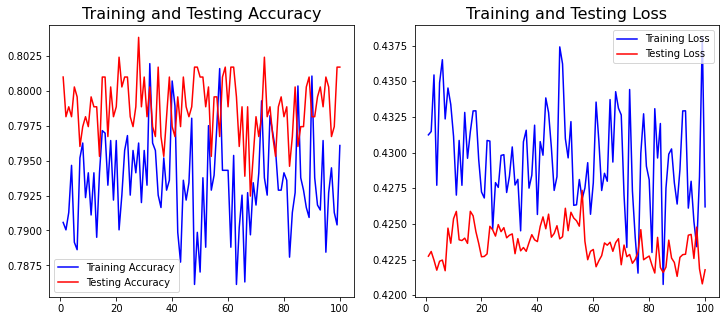

In [33]:
plot_history(standard_model2)

In [34]:
y_pred_tf2 = model_krs2.predict(X_test)
    
y_pred_tf_actual2 = []

for i in y_pred_tf:
    if i > 0.5:
        y_pred_tf_actual2.append(1)
    else:
        y_pred_tf_actual2.append(0)

accuracy = metrics.accuracy_score(y_test, y_pred_tf_actual2)
    
print ("Accuracy : %s" % "{0:.2%}".format(accuracy))

#Print Recall
recall = metrics.recall_score(y_test, y_pred_tf_actual2)
    
print ("Recall : %s" % "{0:.2%}".format(recall))

Accuracy : 79.74%
Recall : 49.34%


**After trying significantly different parameters, the accuracy and recall result was not that different from the previous model. However, from the Accuracy and Loss graph the model seems to be more unstable throughout the iterations comparted to the previous model version.**

# H. Model Inference

In [35]:
X_train

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
5378,0,1,1,0.802817,1,1,1,2,0,2,2,2,0,2,0,2,0.571998
4450,0,0,0,0.197183,1,1,1,0,2,0,2,0,0,0,1,4,0.400598
5691,0,0,0,0.042254,1,0,0,0,0,0,0,0,0,1,0,2,0.015446
5443,0,0,0,0.352113,1,0,1,0,0,0,0,0,0,0,0,1,0.269557
1299,0,1,0,0.140845,1,0,1,0,0,0,0,0,0,0,1,1,0.255605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6557,0,0,0,0.450704,1,1,2,0,2,0,0,2,2,0,1,1,0.813154
439,0,0,0,0.000000,1,0,1,0,0,2,2,0,0,0,0,2,0.365222
1631,1,1,0,0.225352,1,1,2,2,0,2,0,0,0,0,1,3,0.667165
2672,0,0,0,0.366197,1,0,0,0,0,0,0,0,0,1,0,3,0.016941


In [36]:
# Creating new test data

inference_data = [{'SeniorCitizen':0,
                   'Partner':0,
                   'Dependents':0,
                   'tenure':4,
                   'PhoneService':0,
                   'MultipleLines':0,
                   'InternetService':2,
                   'OnlineSecurity':0,
                   'OnlineBackup':0,
                   'DeviceProtection':0,
                   'TechSupport':0,
                   'StreamingTV':0,
                   'StreamingMovies':0,
                   'Contract':0,
                   'PaperlessBilling':1,
                   'PaymentMethod':3,
                   'MonthlyCharges':100}]

inference_data = pd.DataFrame(inference_data, index =[1])

inference_data

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1,0,0,0,4,0,0,2,0,0,0,0,0,0,0,1,3,100


In [37]:
inference_data[cols_to_scale] = scaler.fit_transform(inference_data[cols_to_scale])

y_pred_inference = model_krs.predict(inference_data)

y_pred_inference_actual = []

if y_pred_inference > 0.5:
    y_pred_inference_actual.append('Yes')
else:
    y_pred_inference_actual.append('No')

print(y_pred_inference_actual)

['Yes']


# I. Conclusion and Analysis

* **The churning rate of Telco is higher than most of its' industry peers and therefore Telco needs to improve their customer retention strategy.**
* **It is found that the Churning rate is significantly correlated to the InternetService provided by Telco, what this means is that customers who use Telco Internet Service are more likely to leave Telco. This suggest that customers are largely unhappy with Telco quality service when it comes to Internet Service, therefore the company needs to improve their Internet Service quality in order to reduce the overall churning rate of their customers.**
* **The model created performed well considering that during each iterations (epoch) the accuracy continues to increase while the loss decreases.**
* **The model produced an accuracy of 79.67% and with a recall rate of 55.17%. In regards to the recall rate, the model can accurately identify a customer that is going to leave Telco within a month 55% of the time.**
* **Further model experimentation can be done to both improve the accuracy and recall of the model, but I think the main thing that Telco needs to do ASAP is improve the quality of their InternetService because I believe that will significantly reduce the amount of churning among their customers.**

# J. Model Saving

In [38]:
model_krs.save('Downloads')

INFO:tensorflow:Assets written to: Downloads\assets
